Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [2]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [3]:
# Think I needed this in order to get the code below to run
install.packages("palmerpenguins")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [11]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins) 

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

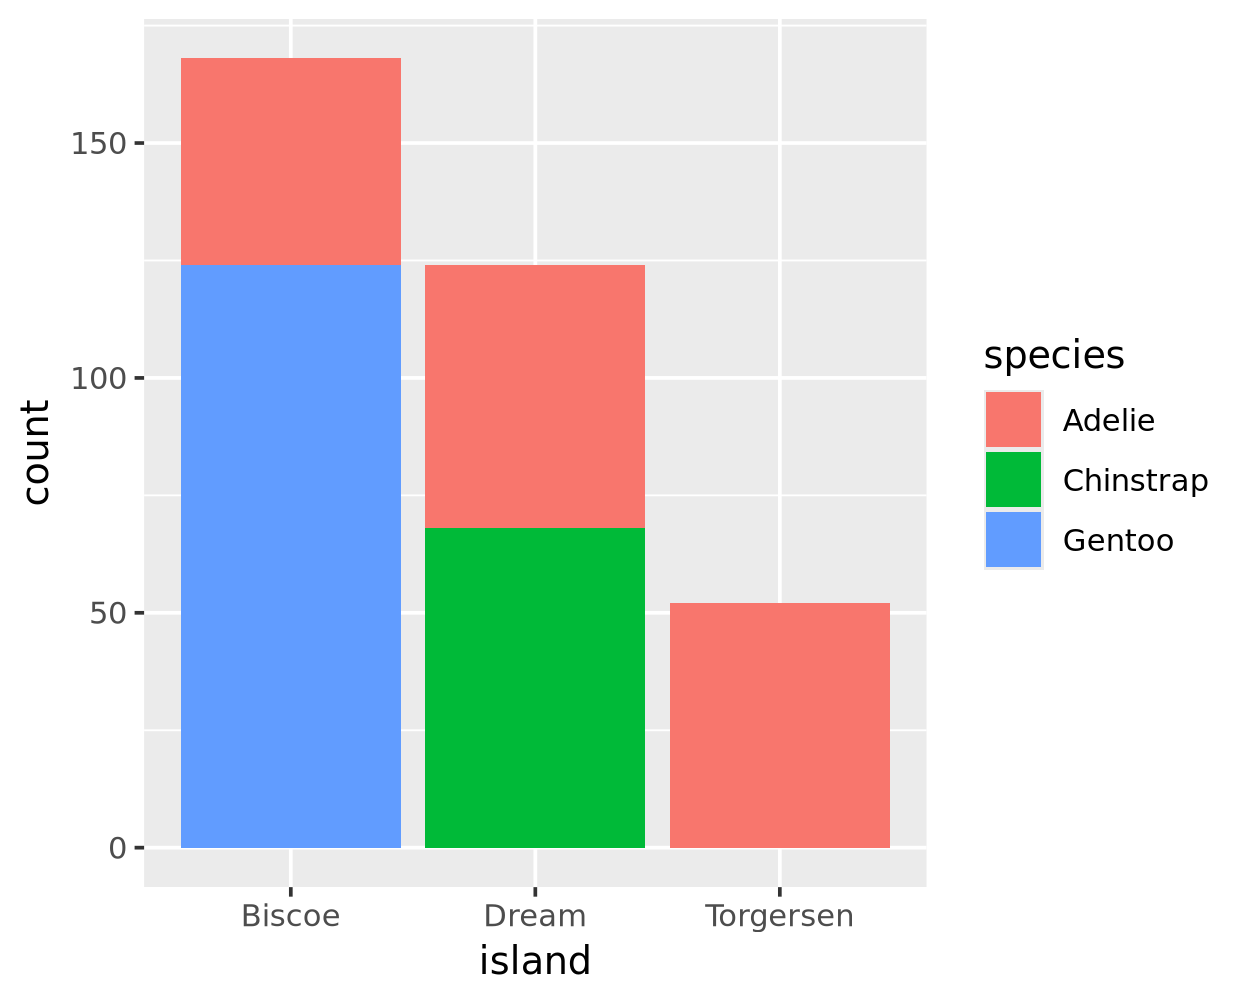

In [5]:
ggplot(data = penguins) + 
  geom_bar(mapping = aes(x = island, fill = species))

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

The Adelie penguins are observed in all they islands. They are a part of the Biscoe, Dream, and Torqersen island. They are the only penguin species in the Torgersen island. 

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

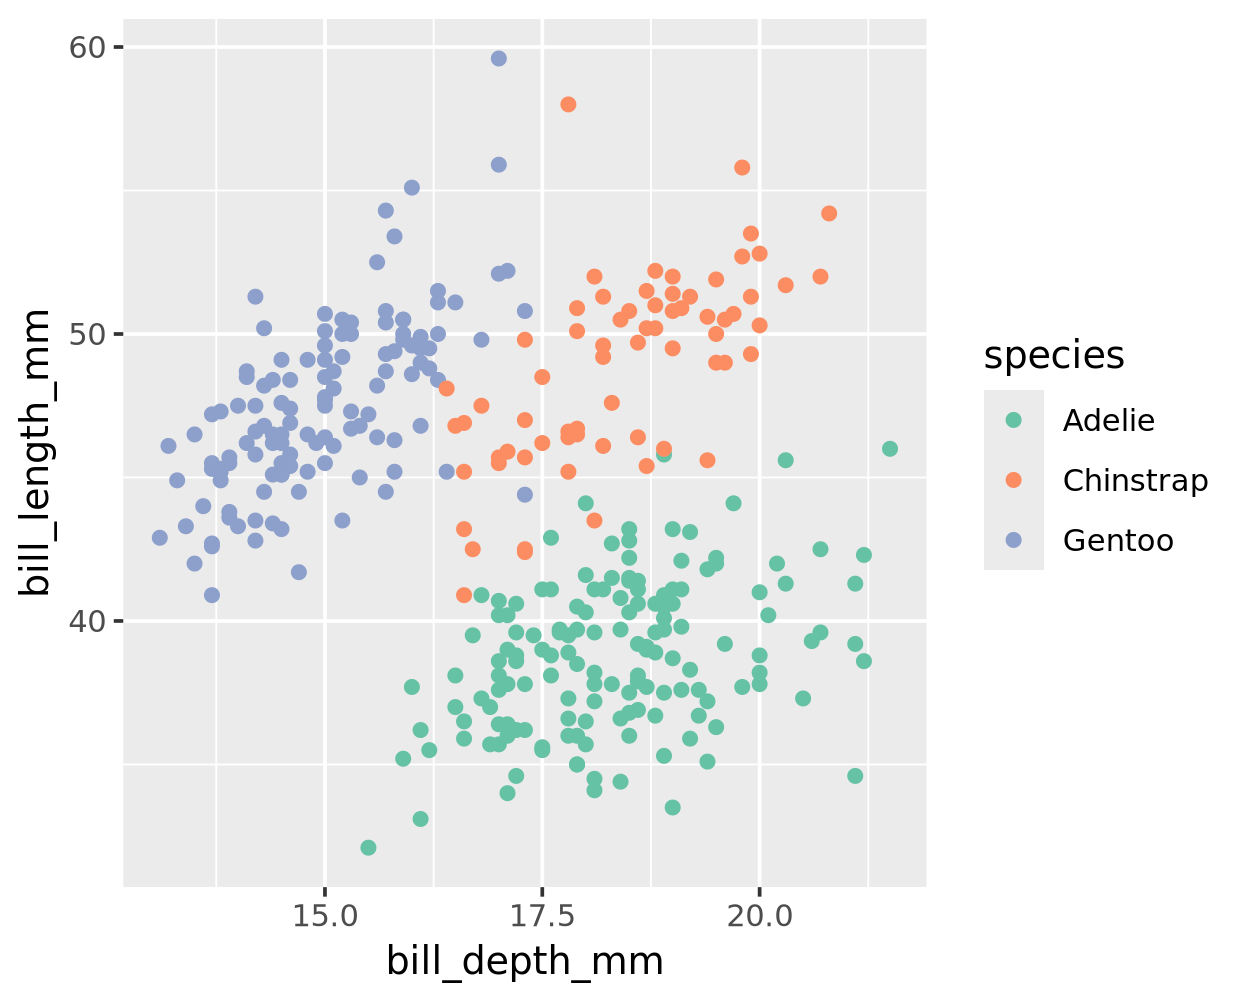

In [6]:
ggplot(data = penguins, mapping = aes(x = bill_depth_mm,
                                      y = bill_length_mm,
                                      color = species)) +
    geom_point(na.rm = TRUE) +
    scale_color_brewer(palette = "Set2")

### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


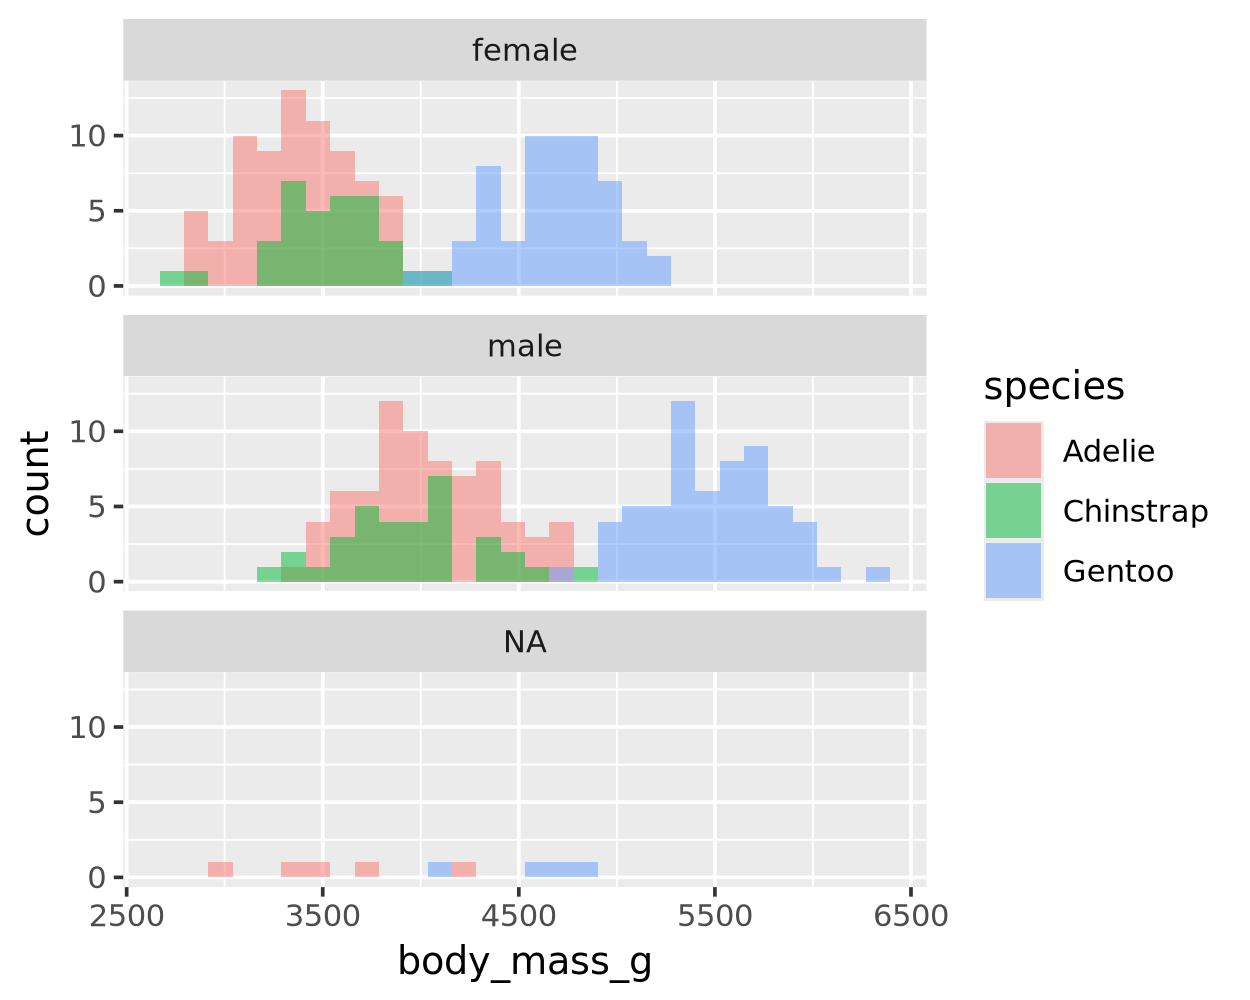

In [29]:
ggplot(penguins, aes(x = body_mass_g, fill = species)) + 
    geom_histogram(position = "identity", alpha = 0.5) + 
    scale_color_brewer(palette = "Set2") +
    facet_wrap(~sex, ncol = 1)

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

According to the reading it says, "position = "identity" will place each object exactly where it falls in the context of the graph. 

So it appears that by removing the "position = "identity" it will plot the graph differently that if we didnt use it. Looking at the graph below (without position or alpha) the scale is different on the y axis. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


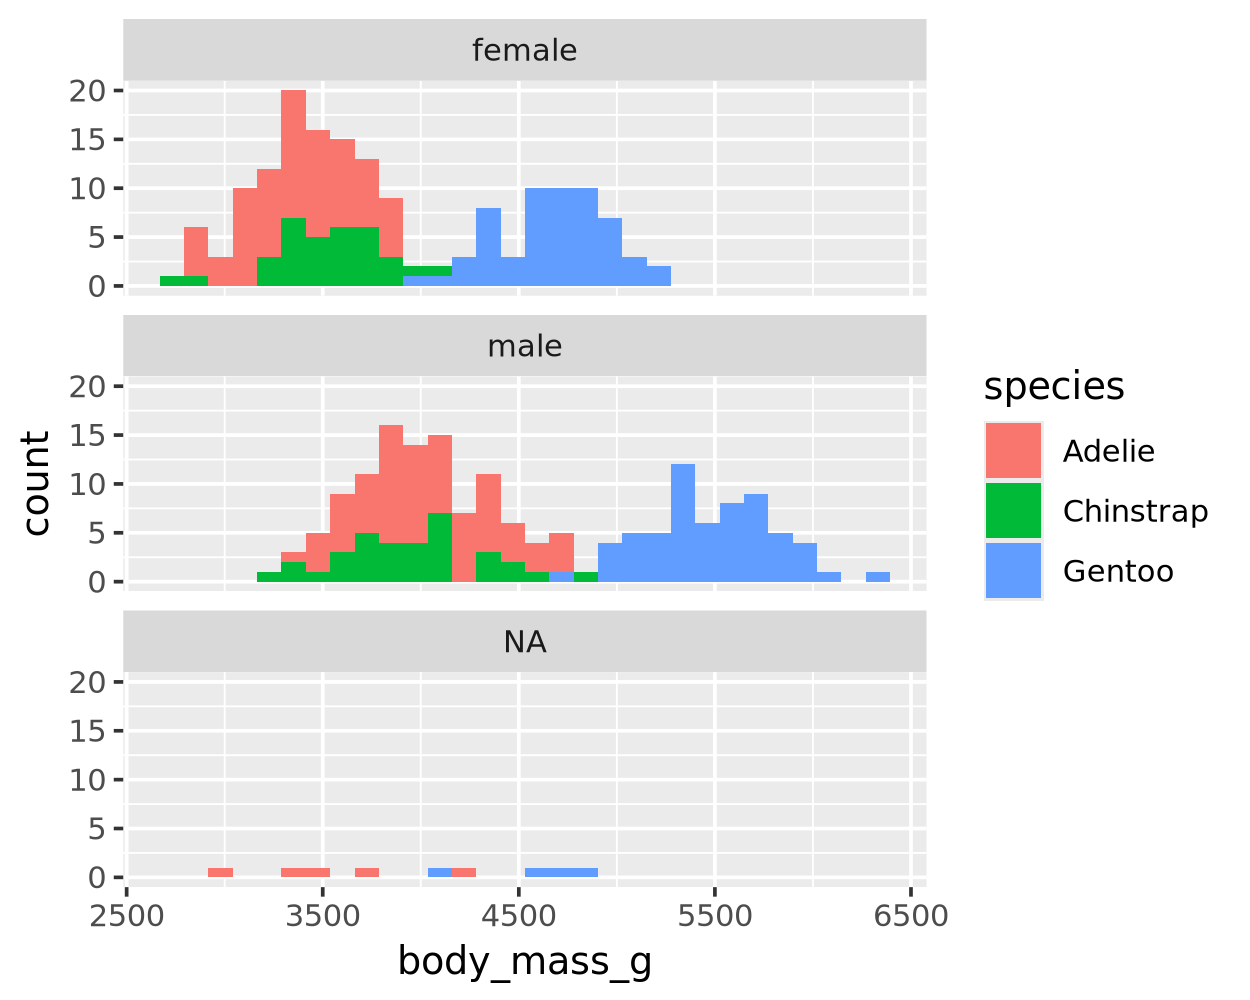

In [31]:
ggplot(penguins, aes(x = body_mass_g, fill = species)) + 
    geom_histogram() + 
    scale_color_brewer(palette = "Set2") +
    facet_wrap(~sex, ncol = 1)

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [39]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [41]:
txhousing$inventory <- NULL
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [49]:
dallas_sub = filter(txhousing, year == 2012 | year == 2013, city == "Dallas")
glimpse(dallas_sub)

Rows: 24
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, 3…
$ volume   <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 12090…
$ median   <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 17420…
$ listings <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 15994…
$ date     <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, 2…


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [68]:
dallas_sub = mutate(dallas_sub, 
       prct_sold = sales/listings * 100)
print(dallas_sub)

# A tibble: 24 × 9
   city    year month sales     volume median listings  date prct_sold
   <chr>  <int> <int> <dbl>      <dbl>  <dbl>    <dbl> <dbl>     <dbl>
 1 Dallas  2012     1  2555  509458081 150800    16721 2012       15.3
 2 Dallas  2012     2  3085  634067291 157100    17173 2012.      18.0
 3 Dallas  2012     3  4068  898320563 167300    17433 2012.      23.3
 4 Dallas  2012     4  4291  983333297 168700    17632 2012.      24.3
 5 Dallas  2012     5  5004 1175419749 175100    17726 2012.      28.2
 6 Dallas  2012     6  5196 1209024869 177900    17587 2012.      29.5
 7 Dallas  2012     7  4859 1117428758 176000    17314 2012.      28.1
 8 Dallas  2012     8  5264 1168296112 174200    16611 2013.      31.7
 9 Dallas  2012     9  4151  921678400 173500    15994 2013.      26.0
10 Dallas  2012    10  4214  885330428 166700    15008 2013.      28.1
# ℹ 14 more rows


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [76]:
dallas_summary = summarize(group_by(dallas_sub, month), mean_prct_sold = mean(prct_sold))
print(dallas_summary)

# A tibble: 12 × 2
   month mean_prct_sold
   <int>          <dbl>
 1     1           20.5
 2     2           23.5
 3     3           32.2
 4     4           34.5
 5     5           38.2
 6     6           37.2
 7     7           37.1
 8     8           38.5
 9     9           31.8
10    10           32.1
11    11           30.6
12    12           35.5


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [77]:
slice_max(dallas_summary, mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [53]:
 txhousing |>
   filter(year == 2012 | year == 2013, city == "Dallas") |>
   mutate(prct_sold = sales/listings *100) |>
   group_by(month) |>
   summarize(mean_prct_sold = mean(prct_sold)) |>
   slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


This code chunk did exactly what we did above, just all at once. It started by taking the "txhousing" data set. Then It filtered it by the year 2012 and 2013 and only had the city "Dallas". After it used the mutate function to create a new column that was calculated by "sales/listings * 100". After it grouped by month, found the mean_prct_sold, and sliced it to have the top 3 months. 

By using the "|>" the information just kept being passed and updated until it got the correct outcome. 